## Problem statement 
Create a mode that can predict prices of real estates prices based on certain features
## Metric for success
A model that can predict house_prices with above 70% accuracy

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import math 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split

In [63]:
real = pd.read_csv(r'C:\Users\Gideon Kipkorir\Desktop\colab\Independent Project Week 7 - house_data.csv')
real.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Eploratory Data Analysis

In [64]:
real.shape

(21613, 20)

In [65]:
real.info()#we do not have categorical data that need encoding.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15)
memory usage: 3.3 MB


In [66]:
#Checking for missing values

real.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [67]:
real =real.drop(['id'], 1)

In [68]:
round(real.describe(), 2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540182.16,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,367362.23,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [69]:
#dividing our dataset into dependent and independent variable

x = real.drop(['price'], 1)
y = real['price']
# y = pd.DataFrame(real.drop(['price'], 1))
# real.iloc[: ,1:19 ]

## univariate analysis

In [70]:
round(real['price'].describe(),2)

count      21613.00
mean      540182.16
std       367362.23
min        75000.00
25%       321950.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: float64

skewness: 4.021716
kurtoisis: 34.522444


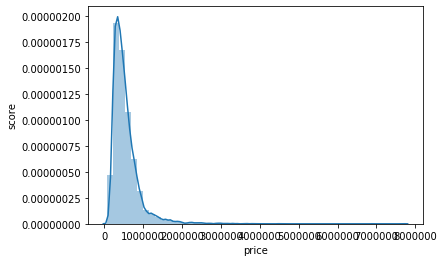

In [71]:
#checking distribution of the target variable, our prediction model will assume normal distribution

import seaborn as sns
sns.distplot(real['price'])
plt.ylabel('score')
print("skewness: %f" % real['price'].skew())
print('kurtoisis: %f' % real['price'].kurt())

The price feature  is not normally distributed. This could be due to presence of outliers. However, since we will need apply quantile regression, outliers will be retained. 

In [72]:
#using log transformation to transform the feature to a normal distribution.

real['price'] = np.log(real['price'])

skewness: 0.428969
kurtoisis: 0.692511


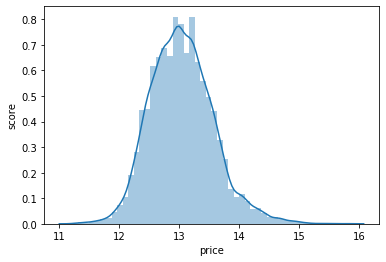

In [73]:
sns.distplot(real['price'])
plt.ylabel('score')
print("skewness: %f" % real['price'].skew())
print('kurtoisis: %f' % real['price'].kurt())

From the observations the independent variables are not normally distributed and will ned transformation.

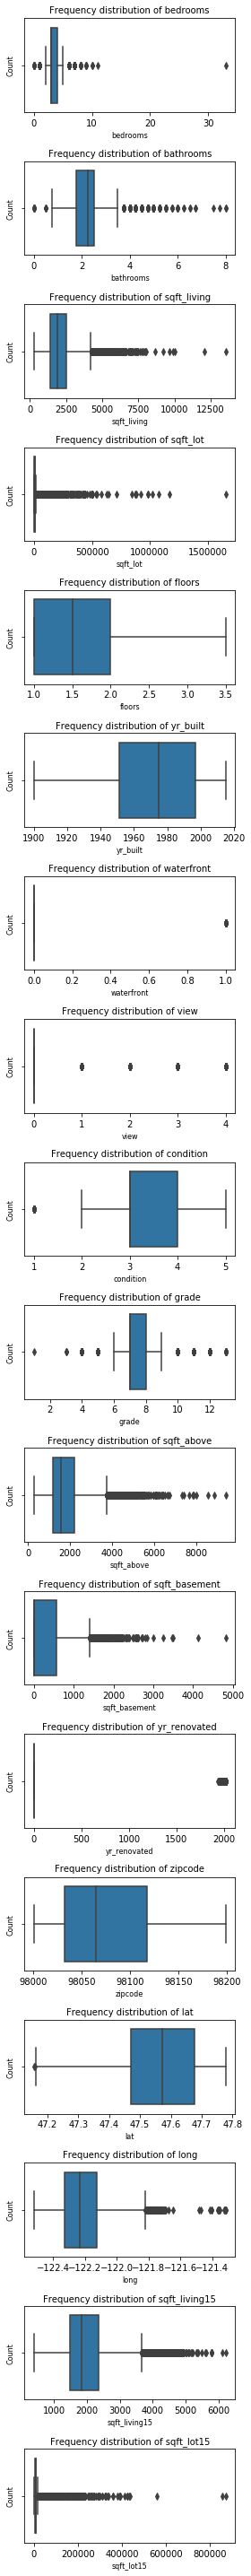

In [74]:
# Checking for outliers

col_names = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_built','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']

fig, ax = plt.subplots(len(col_names), figsize=(4,40))

for i, col_val in enumerate(col_names):
    sns.boxplot(real[col_val], ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show()

Some of our datasets have outliers,  however if the model performs well in the quatile regression model, it will proof that the model is sensitive to outliers. we might retain the outliers if quatile regerssion performs better than the other models

### Bivariate Analysis

C:\Users\Gideon Kipkorir\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


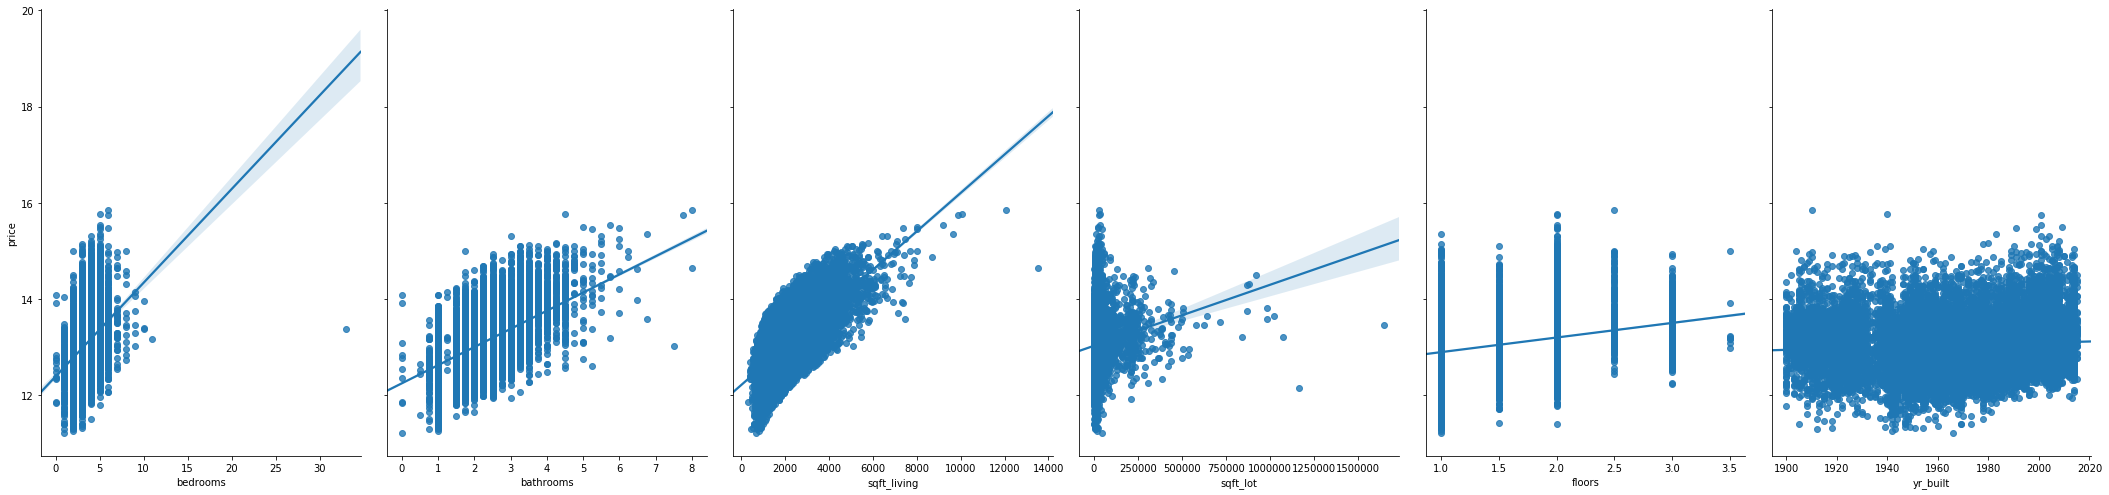

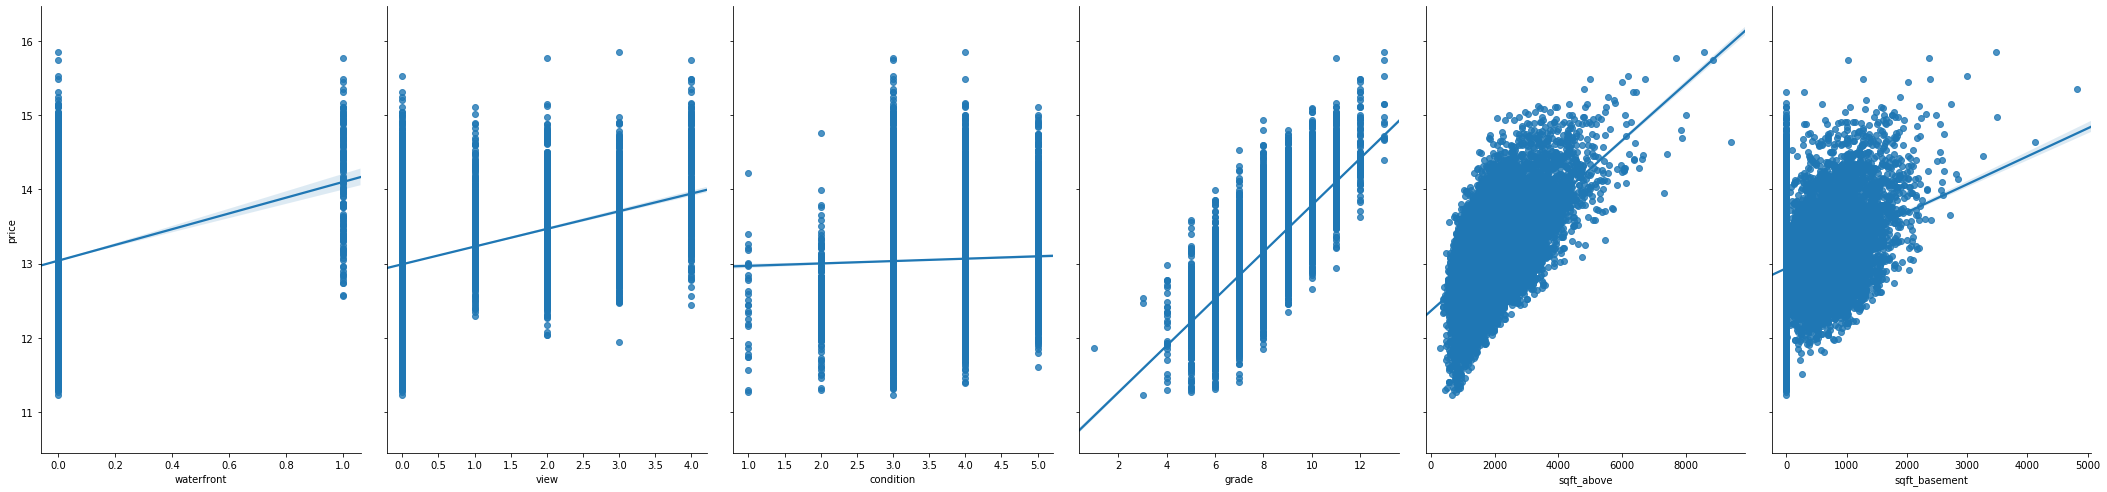

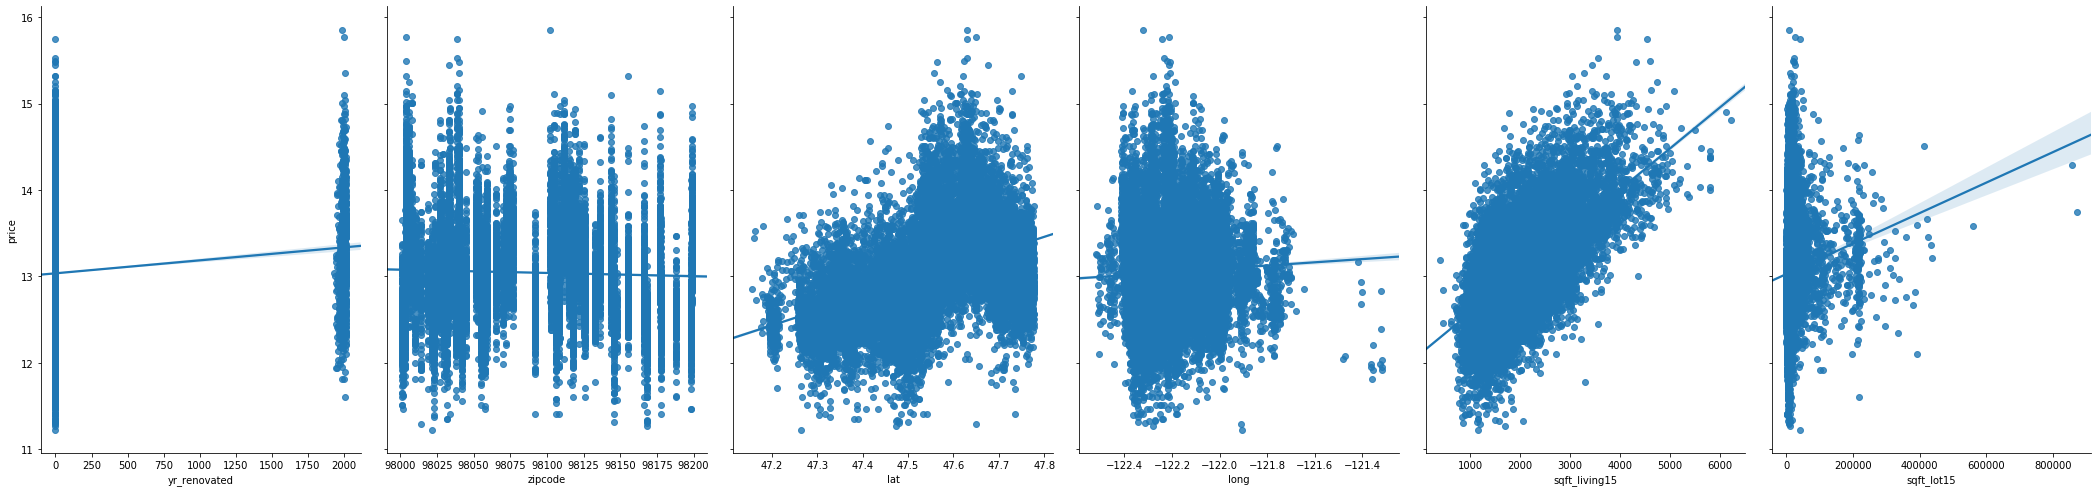

In [75]:
col_a = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_built']
col_b = ['waterfront','view','condition','grade','sqft_above','sqft_basement']
col_c = ['yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']
print(sns.pairplot(real, x_vars=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_built'], y_vars='price', size=7, aspect=0.7, kind='reg'))
print(sns.pairplot(real,x_vars = col_b, y_vars='price', size=7, aspect=0.7, kind='reg'))
print(sns.pairplot(real,x_vars = col_c, y_vars='price', size=7, aspect=0.7, kind='reg'))

Most of the the features appear to have a positive linear relationship with the dependent variable. Feartures such as ; year_built, zipcode','lat', and 'long' have weak relationship with the dependent. 

TypeError: pairplot() got an unexpected keyword argument 'ax'

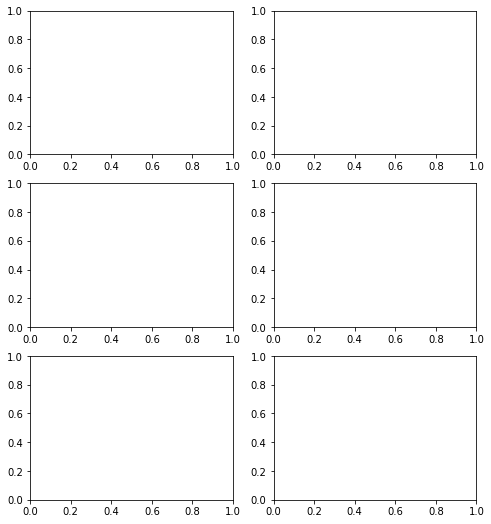

In [45]:
# Plotting distribution of numerical variables
columns = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'waterfront']
nr_rows = 3
nr_cols = 2
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3)) 
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(columns):
            sns.pairplot(real,  x_vars = columns[i], y_vars = real['price'], size=7, aspect=0.7, kind='reg', ax = ax[r])
    
plt.tight_layout()    
plt.show() 

## Multivariate analysis

<Figure size 600x400 with 0 Axes>

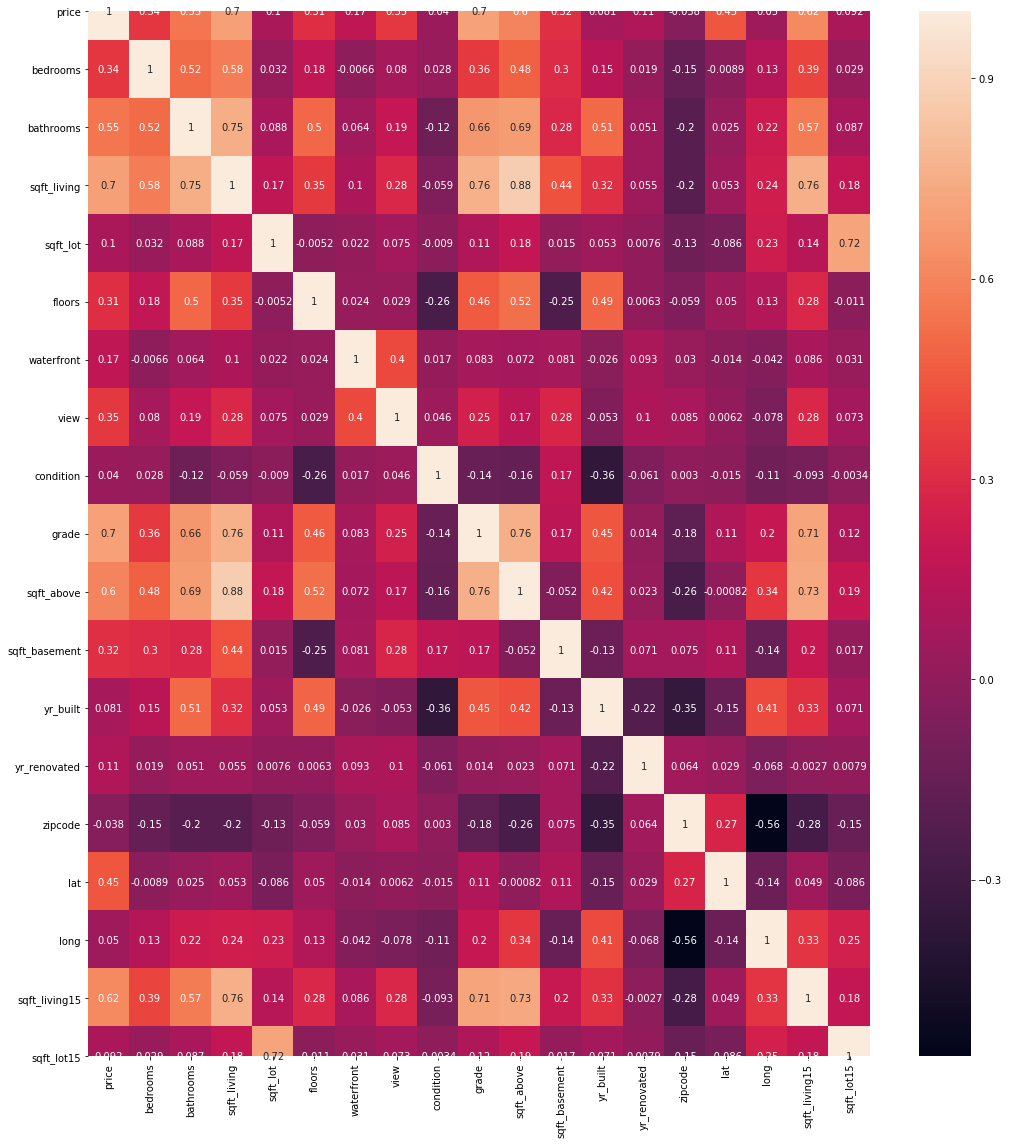

In [46]:
#study of the correlation of independent and dependent variables

plt.figure(dpi=100)
plt.figure(figsize=(15,16))
sns.heatmap(real.corr(), annot = True)
plt.tight_layout()

In [47]:
#checking independent variable for mmulticollinearity using value inflation factor
correlations = x.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.652063,-0.461171,-1.910436e-01,0.049361,0.049695,0.063235,0.114111,-0.050767,0.307048,-6.991123e-01,-3.893809e-01,0.134498,0.045454,0.080112,0.050789,0.017395,0.025213,0.085400
bathrooms,-0.461171,3.350793,-5.077790e+00,-0.024127,-0.675075,0.009760,-0.041645,-0.137020,-0.268005,3.299269e+00,1.365033e+00,-0.935779,-0.259782,0.041796,-0.040956,0.054055,0.092133,0.071471
sqft_living,-0.193610,-5.082483,-3.390727e+13,-0.122796,0.519145,0.453212,-0.596317,-0.364852,-0.783857,3.057171e+13,1.633912e+13,1.670514,0.065848,-0.144612,0.022378,-0.120370,-0.984950,-0.187332
sqft_lot,0.049361,-0.024127,-1.213379e-01,2.102522,0.045263,0.027310,-0.058998,0.030561,-0.053851,-8.981014e-02,1.584871e-02,0.098762,0.021443,-0.002610,0.053366,-0.133162,0.163944,-1.459319
floors,0.049695,-0.675075,5.209698e-01,0.045263,2.011907,-0.005281,-0.040627,0.089673,-0.230851,-9.732868e-01,3.641803e-01,-0.481480,-0.080603,-0.170766,-0.127637,0.164067,0.272617,0.072658
waterfront,0.063235,0.009760,4.531804e-01,0.027310,-0.005281,1.203766,-0.492545,-0.012670,0.049240,-5.206151e-01,-2.220971e-01,-0.021050,-0.065403,0.022551,0.009896,0.027438,0.054452,-0.018470
view,0.114111,-0.041645,-5.961764e-01,-0.058998,-0.040627,-0.492545,1.435160,-0.021475,-0.185237,5.768426e-01,3.089686e-02,0.151620,-0.040236,-0.140679,0.118486,0.071508,-0.325615,-0.007493
condition,-0.050767,-0.137020,-3.647928e-01,0.030561,0.089673,-0.012670,-0.021475,1.249475,-0.054454,3.844286e-01,7.834380e-02,0.561549,0.206672,0.161268,0.063674,-0.007029,0.075861,-0.028255
grade,0.307048,-0.268005,-7.812526e-01,-0.053851,-0.230851,0.049240,-0.185237,-0.054454,3.417046,-9.051427e-01,-1.097847e-01,-0.638980,-0.071422,0.083321,-0.330869,0.393834,-0.911603,0.071874
sqft_above,-0.700591,3.309250,3.057171e+13,-0.088647,-0.972377,-0.520725,0.577207,0.384522,-0.902953,-2.756427e+13,-1.473179e+13,-0.986196,-0.060296,0.054667,0.160893,-0.233151,-0.647654,-0.006817


    VIF scores for most of the indpendent variables are below 5, suggesting that the features have multicolinearity.However, a test for homoscedasticity /hetreoscedasticity using Barlett's test will show the real impact of multicolinearity.

In [48]:
# #droping variables with weak correlation with the dependent variable
# real = real.drop(columns = ['yr_built','condition','lat','long','sqft_living15','sqft_lot' ], axis = 1)

In [49]:
#dividing our dataset into dependent and independent variable

x = real.drop(['price'], 1)
y = real['price']

In [50]:
#splitting our dataset to obtain training and testing dataset

x_train,x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state = 0)

In [61]:
x_train.head()
y_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5268,3,1.0,1570,5510,1.0,0,0,4,7,1070,500,1940,0,98115,47.6942,-122.319,1770,6380
16909,3,2.5,1780,11000,1.0,0,0,4,8,1210,570,1980,0,98006,47.5574,-122.149,2310,9700
16123,3,1.5,1090,9862,1.0,0,0,3,8,1090,0,1987,0,98074,47.6256,-122.036,1710,9862
12181,4,2.5,2210,7079,2.0,0,0,3,8,2210,0,1993,0,98031,47.4206,-122.183,1970,7000
12617,3,2.5,1800,4763,2.0,0,0,3,7,1240,560,1985,0,98119,47.6460,-122.362,1790,4763


## Quantile regression model approach

In [78]:
import statsmodels.formula.api as smf
quantiles = [0.1, 0.25,0.5, 0.75, 0.8, 0.9]
mod = smf.quantreg('x~y',real )
for i in quantiles:
    res = mod.fit(q = i)
    print(res.summary())


ValueError: operands could not be broadcast together with shapes (21613,2) (21613,1,18) 

In [81]:
#standardizing our dataset

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## baseline model (linear model)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linearreg = LinearRegression()

#Fitting the linear model to the dataset
linearreg.fit(x_train, y_train)
linear_model = mean_squared_error(y_true = y_test, y_pred = linearreg.predict(x_test))
print('mean_squared_error: ', linear_model)
print('Accuracy: ', linearreg.score(x_test, y_test))


mean_squared_error:  0.06171367735791922
Accuracy:  0.7694831332854436


**Test for homoscedasticity /hetreoscedasticity**

In [29]:
# residual plots
from sklearn import metrics
y_pred = linearreg.predict(x_test)
residuals = np.subtract(y_test, y_pred )

residuals_mean = residuals.mean()
print(residuals.describe())
print(residuals_mean)

count    4323.000000
mean       -0.017969
std         0.247800
min        -1.243399
25%        -0.177015
50%        -0.012741
75%         0.139471
max         1.082838
Name: price, dtype: float64
-0.017968526940154637


inf
the variances are homogeneous!


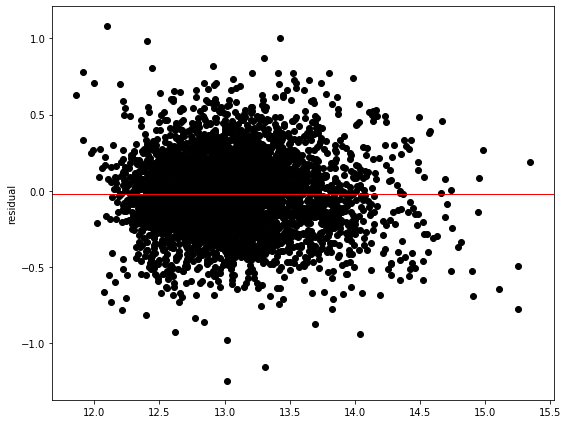

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, color = 'k')
plt.axhline(y = residuals.mean(), color ='r', linewidth = 1)
plt.ylabel('residual')
# plt.xlabel('fitted values')
plt.tight_layout()

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value


critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

## Ridge Regression approach

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
ridge = Ridge(normalize = True)
search = GridSearchCV(estimator= ridge, param_grid = {'alpha': np.logspace(-5,2,100)}, scoring = 'neg_mean_squared_error', n_jobs = 1, refit = True,cv = 10) 

In [32]:
search.fit(x_train, y_train)

X = search.best_params_
print(X)
print(abs(search.best_score_))

{'alpha': 0.002154434690031882}
0.06454409915324016


In [33]:
#fiting our model

ridge = Ridge(normalize = True, alpha =  0.002154434690031882)
ridge.fit(x_train, y_train)

#parameters

ridge_model = mean_squared_error(y_true = y_test, y_pred = ridge.predict(x_test))
print('mean_squared_error: ',ridge_model)
score = ridge.score(x_test, y_test)
print('Accuracy: ', score)

#coef's of the model
# coef_dict_ridge = {}
# for coef, feat in zip(ridge.coef_,data("real").columns):
#     coef_dict_ridge[feat] = coef
# coef_dict_ridge



mean_squared_error:  0.061713104210060994
Accuracy:  0.7694852741439064


## Lasso  Regerssion Model approach

In [34]:
from sklearn.linear_model import Lasso
from warnings import filterwarnings
filterwarnings('ignore')

#getting the best parameter seting
lasso = Lasso(normalize = True)
search = GridSearchCV(estimator = lasso, param_grid={'alpha': np.logspace(-10,1, 100)}, scoring = 'neg_mean_squared_error', n_jobs= 1, refit =True, cv = 10 )

In [35]:
#Getting the parameters setting
search.fit(x_train, y_train)
# params_ = round(search.best_params_, 5)
print('alpha: ', search.best_params_)

alpha:  {'alpha': 1.2915496650148827e-07}


In [36]:
#fiting the lasso model
lasso = Lasso(normalize = True , alpha  = 0.0000001291)
lasso.fit(x_train, y_train)

#parameters
lasso_model = mean_squared_error(y_true = y_test, y_pred = lasso.predict(x_test))
print('mean_squared_error: ',lasso_model)
score = ridge.score(x_test, y_test)
print('Accuracy: ', score)

mean_squared_error:  0.06173000484336973
Accuracy:  0.7694852741439064


**Test for homoscedasticity /hetreoscedasticity**

In [33]:
# residual plots

y_pred = lasso.predict(x_test)
residuals = np.subtract(y_test, y_pred )

residuals_mean = residuals.mean()
print(residuals.describe())
print(residuals_mean)
 

count    4323.000000
mean       -0.017969
std         0.247833
min        -1.241865
25%        -0.176825
50%        -0.012861
75%         0.139735
max         1.084386
Name: price, dtype: float64
-0.017968526940154633


inf
the variances are homogeneous!


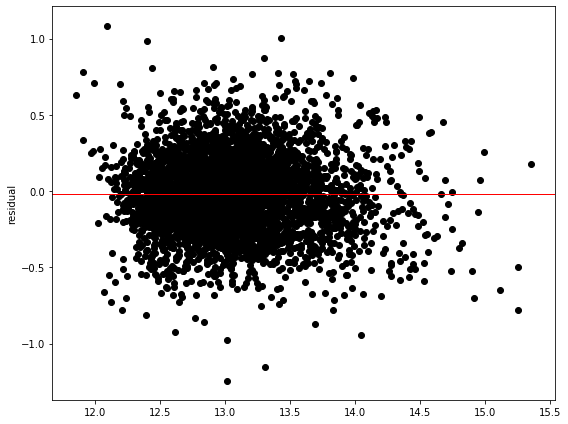

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, color = 'k')
plt.axhline(y = residuals.mean(), color ='r', linewidth = 1)
plt.ylabel('residual')
# plt.xlabel('fitted values')
plt.tight_layout()



test_result, p_value = sp.stats.bartlett(y_pred, residuals)
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value


critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

## Elasticnet Model aprroach

In [35]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(normalize =True )
search=GridSearchCV(estimator=elasticnet,param_grid={'alpha':np.logspace(-5,1,20),'l1_ratio':[.1,.2,.3,.4,.5,.6,.7,.8,.9,]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

search.fit(x_train, y_train)
print("params_:", search.best_params_)
print('accuracy:', abs(search.best_score_))

params_: {'alpha': 1e-05, 'l1_ratio': 0.9}
accuracy: 0.06462575691238209


In [36]:
#fiting the lasso model
elasticnet = ElasticNet( alpha  = 0.00001, l1_ratio = 0.9, normalize = True  )
elasticnet.fit(x_train, y_train)

#parameters
elasticnet_model = mean_squared_error(y_true = y_test, y_pred = elasticnet.predict(x_test))
print('mean_squared_error: ',elasticnet_model)
score = elasticnet.score(x_test, y_test)
print('Accuracy: ', score)

mean_squared_error:  0.06171262912935235
Accuracy:  0.7694870486956926


**Test for homoscedasticity /hetreoscedasticity**

In [37]:
# residual plots

y_pred = lasso.predict(x_test)
residuals = np.subtract(y_test, y_pred )

residuals_mean = residuals.mean()
print(residuals.describe())
print(residuals_mean)
 

count    4323.000000
mean       -0.017969
std         0.247833
min        -1.241865
25%        -0.176825
50%        -0.012861
75%         0.139735
max         1.084386
Name: price, dtype: float64
-0.017968526940154633


inf
the variances are homogeneous!


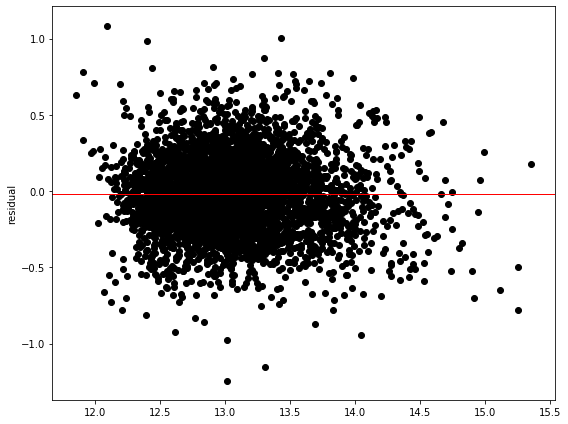

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, color = 'k')
plt.axhline(y = residuals.mean(), color ='r', linewidth = 1)
plt.ylabel('residual')
# plt.xlabel('fitted values')
plt.tight_layout()



test_result, p_value = sp.stats.bartlett(y_pred, residuals)
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value


critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

### comparison of mean squared error with other models

In [39]:
list_scores = [linear_model, ridge_model, lasso_model, elasticnet_model]
list_regressors = ['Linear','Ridge','Lasso','ElasticNet']

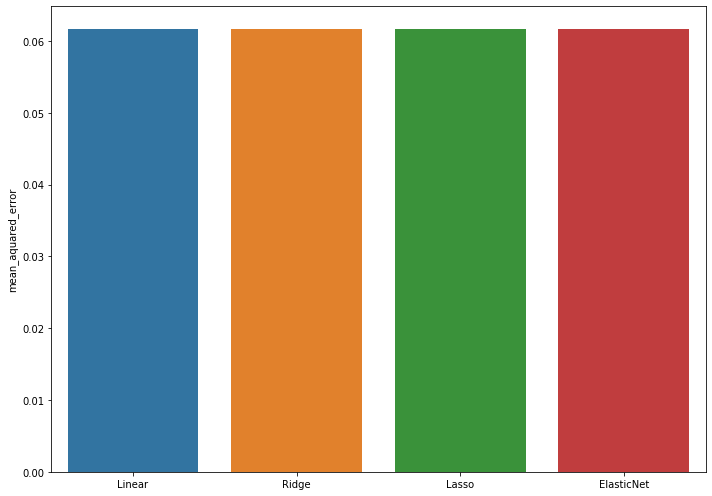

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.barplot(x=list_regressors, y=list_scores, ax=ax)
plt.ylabel('mean_aquared_error')
plt.tight_layout()
plt.show()

From the above observation, there is no advantage of using one model over the other. This is because the change in mean_squared is neglible, proofing that the baseline (linear model) is equally good to rest of the models.